In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(3)

In [ ]:
!pip  install -q kaggle

In [ ]:
from google.colab import files # Go to the account sectinon of the kaggle and generate a new API key if you don't have one already and uplod your api key file here
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"veenath03","key":"21399c95eee246e339a9d014e1cd9565"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d devzohaib/tvmarketingcsv

Dataset URL: https://www.kaggle.com/datasets/devzohaib/tvmarketingcsv
License(s): unknown
tvmarketingcsv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip tvmarketingcsv.zip

Archive:  tvmarketingcsv.zip
replace .gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Case_study_Simple_Linear_Regression.ipynb? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace tvmarketing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
path = '/content/tvmarketing.csv'

adv = pd.read_csv(path)

In [ ]:
adv

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


<Axes: xlabel='TV', ylabel='Sales'>

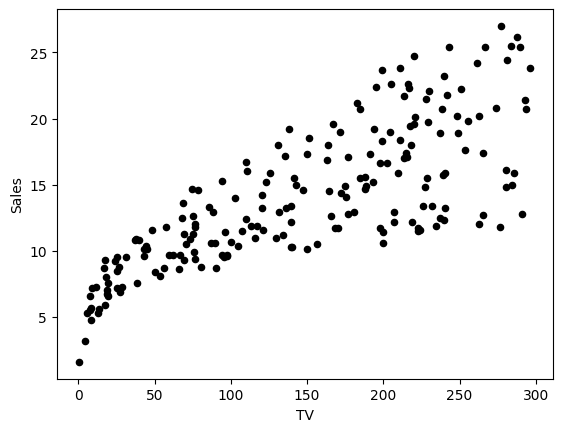

In [ ]:
adv.plot(x='TV',y='Sales',kind='scatter', c='black')

In [ ]:
adv_TV=(adv['TV']-np.mean(adv['TV']))/np.std(adv['TV'])
adv_sales=(adv['Sales']-np.mean(adv['Sales']))/np.std(adv['Sales'])
""" this is for normalization
and the np.std is standerd deviation
the top adv-np.mean(adv) is the centering data
We do this beacuse the tv and sales are in different units
 """
adv_norm = pd.DataFrame({
                    "TV": adv_TV,
                    "Sales":adv_sales
})

In [ ]:
adv_norm

,TV,Sales
0,0.969852,1.552053
1,-1.197376,-0.696046
2,-1.516155,-0.907406
3,0.052050,0.860330
4,0.394182,-0.215683
...,...,...
195,-1.270941,-1.234053
196,-0.617035,-0.830548
197,0.349810,-0.234898
198,1.594565,2.205347


<Axes: xlabel='TV', ylabel='Sales'>

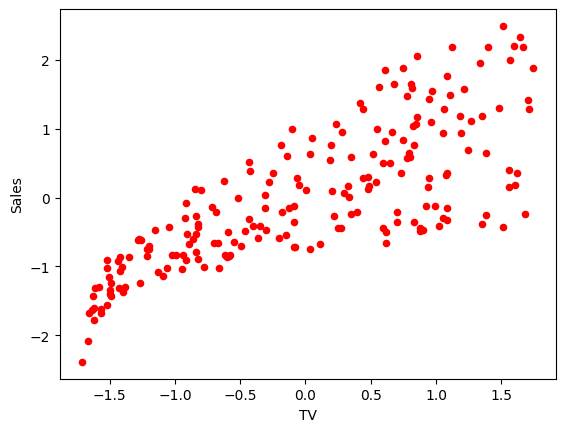

In [ ]:
adv_norm.plot(x='TV',y='Sales',kind='scatter', c='red')

In [ ]:
#creating traing data set

X_norm = adv_norm['TV']
Y_norm = adv_norm['Sales']

X_norm = np.array(X_norm).reshape(1,len(X_norm))
Y_norm = np.array(Y_norm).reshape(1,len(Y_norm))

print ('The shape of X_norm: ' + str(X_norm.shape))
print ('The shape of Y_norm: ' + str(Y_norm.shape))
print ('I have m = %d training examples!' % (X_norm.shape[0]))

The shape of X_norm: (1, 200)
The shape of Y_norm: (1, 200)
I have m = 1 training examples!


In [ ]:
X = X_norm.shape[0]
Y = Y_norm.shape[0]
w = np.random.randn(X,Y)*0.01
w.shape


(1, 1)

In [ ]:
def create_layers(X,Y): # creating input and output layers

  x_l = X.shape[0]
  y_l = Y.shape[0]

  return x_l , y_l

(x1, y1) = create_layers(X_norm,Y_norm)


In [ ]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]

    return (n_x, n_y)

(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


In [ ]:
def set_parameters(x_l,y_l):


  w = np.random.randn(y_l,x_l)* 0.01
  b = np.zeros((y_l,1))


  parameters = {
                  "W" : w,
                  "b":  b

  }
  print(f"the parameters are W {parameters['W'].shape}")
  return parameters
parameters = set_parameters(x1,y1)
parameters


the parameters are W (1, 1)


{'W': array([[-0.00267762]]), 'b': array([[0.]])}

In [ ]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """

    w = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))

    parameters = {"W": w,
                  "b": b}
    print(w)
    print(b)

    return parameters

parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

[[-0.01743141 -0.0059665 ]]
[[0.]]
W = [[-0.01743141 -0.0059665 ]]
b = [[0.]]


In [ ]:
def forward_propergation(X,parameters):
  w = parameters["W"]
  b = parameters["b"]
  #print(f"the value of w is {w.shape} , X shape is {X.shape}")
  Z = np.matmul(w,X)+ b
  y_hat=Z

  return y_hat

y_hat=forward_propergation(X_norm,set_parameters(x1,y1))
y_hat[0, 0:5]


the parameters are (1, 1)


array([ 0.00606395, -0.00748653, -0.00947968,  0.00032544,  0.0024646 ])

In [ ]:
def cost_function(Y,y_hat):
  m = y_hat.shape[1]

  cost = (np.sum((Y-y_hat)**2))/(y_hat.shape[1]*2)

  return cost
cost =cost_function(Y_norm,y_hat)
cost

0.4992456388234349

In [ ]:
def backwrod_propergation(X,Y,y_hat):

  m = X.shape[1]

  dZ = y_hat - Y
  dw = 1/m*(np.matmul(dZ,X.T))
  db = 1/m * np.sum(dZ, axis = 1, keepdims = True)

  partial_derivatives={
                      "dZ":dZ,
                      "dw":dw,
                      "db":db
  }

  return partial_derivatives

In [ ]:
partial_derivatives = backwrod_propergation(X_norm,Y_norm,y_hat)

In [ ]:
def update_parameters(parameters,grad,learning_rate=1.2):

  w= parameters["W"]
  b = parameters["b"]

  dw = grad["dw"]
  db = grad["db"]

  w = w -( learning_rate*dw)
  b = b -( learning_rate*db)

  parameters = {
                  "W" : w,
                  "b":  b

  }

  return parameters


In [ ]:
def nn_model(X,Y,num_iterations = 10,print_cost = False):


  n_x = create_layers(X, Y)[0]
  n_y = create_layers(X, Y)[1]
  parameters = set_parameters(n_x, n_y)

  for i in range(0, num_iterations):

    y_hat = forward_propergation(X,parameters)

    cost = cost_function(Y,y_hat)

    grad = backwrod_propergation(X,Y,y_hat)

    parameters=update_parameters(parameters,grad,learning_rate=1.2)

    if print_cost:
            print(f"the values afterr {i} iteration is parameters {parameters}")
            print ("Cost after iteration %i: %f" %(i, cost))

  return parameters





In [ ]:
simple_parameters = nn_model(X_norm,Y_norm,num_iterations = 30,print_cost=True)

the parameters are (1, 1)
the values afterr 0 iteration is parameters {'W': array([[0.93976003]]), 'b': array([[-2.0783375e-16]])}
Cost after iteration 0: 0.504281


In [ ]:
def predict(X,Y,parameters,X_pred):


   w = parameters["W"]
   b = parameters["b"]

   if isinstance(X,pd.Series):
      X_mean = np.mean(X)
      X_std = np.std(X)
      X_pred = ((X_pred-X_mean)/X_std).reshape(1,len(X_pred))

   else:
        X_mean = np.mean(X, axis=0).values.reshape((len(X.axes[1]), 1))
        X_std = np.std(X, axis=0).values.reshape((len(X.axes[1]), 1))
        X_pred_norm = ((X_pred - X_mean)/X_std)

   Y_pred = np.matmul(w,X_pred)+ b
   Y_pred_norm = Y_pred * np.std(Y) + np.mean(Y)
   return Y_pred_norm

X_pred = np.array([50, 120, 280])
Y_pred = predict(adv["TV"], adv["Sales"], simple_parameters, X_pred)
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales:\n{Y_pred}")


TV marketing expenses:
[ 50 120 280]
Predictions of sales:
[[ 8.4803783  12.47809599 21.61573643]]


<h>Multiple inputs <h/>

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/house-prices-advanced-regression-techniques.zip

Archive:  /content/house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df = pd.read_csv('/content/house_prices_train.csv')

In [ ]:
display(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
X_multi = df[['GrLivArea', 'OverallQual']]
Y_multi = df['SalePrice']

In [ ]:
type(X_multi)

pandas.core.frame.DataFrame

In [ ]:
X_multi_norm1 = (X_multi['GrLivArea']-np.mean(X_multi['GrLivArea']))/np.std(X_multi['GrLivArea'])
X_multi_norm2 = (X_multi['OverallQual']-np.mean(X_multi['OverallQual']))/np.std(X_multi['OverallQual'])
Y_multi_norm = (Y_multi-np.mean(Y_multi))/np.std(Y_multi)

In [ ]:
X_multi_norm = pd.DataFrame({
                              "GrLivArea":X_multi_norm1,
                              "OverallQual":X_multi_norm2
})

In [ ]:
X_multi_norm = np.array(X_multi_norm).T
Y_multi_norm = np.array(Y_multi_norm).reshape((1, len(Y_multi_norm)))

print ('The shape of X: ' + str(X_multi_norm.shape))
print ('The shape of Y: ' + str(Y_multi_norm.shape))
print ('I have m = %d training examples!' % (X_multi_norm.shape[1]))

The shape of X: (2, 1460)
The shape of Y: (1, 1460)
I have m = 1460 training examples!


In [ ]:
n_x = create_layers(X_multi_norm, Y_multi_norm)[0]
n_y = create_layers(X_multi_norm, Y_multi_norm)[1]
parameters = set_parameters(n_x, n_y)
parameters

the parameters are W (1, 2)


{'W': array([[0.01108187, 0.01119391]]), 'b': array([[0.]])}

In [ ]:
parameters_multi = nn_model(X_multi_norm, Y_multi_norm, num_iterations=100, print_cost=True)

print("W = " + str(parameters_multi["W"]))
print("b = " + str(parameters_multi["b"]))

W_multi = parameters_multi["W"]
b_multi = parameters_multi["b"]

the parameters are W (1, 2)
the values afterr 0 iteration is parameters {'W': array([[0.86189996, 0.94688067]]), 'b': array([[1.66442202e-16]])}
Cost after iteration 0: 0.508841
the values afterr 1 iteration is parameters {'W': array([[0.00416065, 0.14646609]]), 'b': array([[2.05132714e-16]])}
Cost after iteration 1: 0.443962
the values afterr 2 iteration is parameters {'W': array([[0.74529067, 0.91692395]]), 'b': array([[1.05851401e-16]])}
Cost after iteration 2: 0.392296
the values afterr 3 iteration is parameters {'W': array([[0.04879998, 0.23543765]]), 'b': array([[2.24112966e-16]])}
Cost after iteration 3: 0.349949
the values afterr 4 iteration is parameters {'W': array([[0.67304985, 0.86736389]]), 'b': array([[8.39511109e-17]])}
Cost after iteration 4: 0.314912
the values afterr 5 iteration is parameters {'W': array([[0.09851553, 0.29675687]]), 'b': array([[1.83232425e-16]])}
Cost after iteration 5: 0.285835
the values afterr 6 iteration is parameters {'W': array([[0.61947143, 0.

In [ ]:
n_x = layer_sizes(X_multi_norm, Y_multi_norm)[0]
n_y = layer_sizes(X_multi_norm, Y_multi_norm)[1]
parameters = initialize_parameters(n_x, n_y)
parameters['W'].shape

[[ 0.01487543 -0.01118301]]
[[0.]]


(1, 2)

In [ ]:
X_pred_multi = np.array([[1710, 7], [1200, 6], [2200, 8]]).T
Y_pred_multi = predict(X_multi, Y_multi, parameters_multi, X_pred_multi)

print(f"Ground living area, square feet:\n{X_pred_multi[0]}")
print(f"Rates of the overall quality of material and finish, 1-10:\n{X_pred_multi[1]}")
print(f"Predictions of sales price, $:\n{np.round(Y_pred_multi)}")

Ground living area, square feet:
[1710 1200 2200]
Rates of the overall quality of material and finish, 1-10:
[7 6 8]
Predictions of sales price, $:
[[50671624. 35662388. 65094043.]]


In [ ]:
X_mean = np.mean(X_multi_norm, axis=0).values.reshape((len(X_multi_norm.axes[1]), 1))
X_std = np.std(X_multi_norm, axis=0).values.reshape((len(X_multi_norm.axes[1]), 1))
X_pred_norm = ((X_pred - X_mean)/X_std)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
X_mean = np.mean(X_multi_norm, axis=0).reshape((len(X_multi_norm[0]), 1))
X_std = np.std(X_multi_norm, axis=0).reshape((len(X_multi_norm[0]), 1))

In [ ]:
X_mean = np.array(np.mean(X)).reshape((len(X.axes[1]),1))
X_std = np.array(np.std(X)).reshape((len(X.axes[1]),1))
X_pred_norm = ((X_pred - X_mean)/X_std)

AttributeError: 'int' object has no attribute 'axes'